<a href="https://colab.research.google.com/github/DrPaulaEkene/ADS-Assignment/blob/main/Uterine_Myoma_(Uterine_fibroids)_MRI_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook focuses on the Comparative Analysis of Deep Learning Architectures for Uterine Myoma Classification: Custom CNN vs. VGGNet-16 and ResNet50**

*Import all needed libraries*

In [2]:
# Make all necessary imports
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the drive module
from google.colab import drive

# Mount the Google Drive to the specified mount point in the Colab environment.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Create the data file paths/directories
import os
data_directory = "/content/drive/MyDrive/UMD"
print(os.listdir('/content/drive/MyDrive/UMD'))

['.DS_Store', 'UMD_221129_292', 'UMD_221129_293', 'UMD_221129_295', 'UMD_221129_294', 'UMD_221129_299', 'UMD_221129_298', 'UMD_221129_300', 'UMD_221129_296', 'UMD_221129_291', 'UMD_221129_297', 'UMD_221129_289', 'UMD_221129_282', 'UMD_221129_287', 'UMD_221129_288', 'UMD_221129_290', 'UMD_221129_286', 'UMD_221129_285', 'UMD_221129_283', 'UMD_221129_284', 'UMD_221129_281', 'UMD_221129_274', 'UMD_221129_276', 'UMD_221129_280', 'UMD_221129_271', 'UMD_221129_272', 'UMD_221129_275', 'UMD_221129_273', 'UMD_221129_279', 'UMD_221129_278', 'UMD_221129_277', 'UMD_221129_263', 'UMD_221129_268', 'UMD_221129_267', 'UMD_221129_270', 'UMD_221129_261', 'UMD_221129_269', 'UMD_221129_262', 'UMD_221129_266', 'UMD_221129_265', 'UMD_221129_264', 'UMD_221129_258', 'UMD_221129_254', 'UMD_221129_257', 'UMD_221129_252', 'UMD_221129_256', 'UMD_221129_260', 'UMD_221129_253', 'UMD_221129_255', 'UMD_221129_259', 'UMD_221129_251', 'UMD_221129_242', 'UMD_221129_243', 'UMD_221129_250', 'UMD_221129_247', 'UMD_221129_24

In [8]:
# List all contents of the directory
contents = os.listdir(data_directory)
print("Contents of the UMD dataset directory:", contents)

Contents of the UMD dataset directory: ['.DS_Store', 'UMD_221129_292', 'UMD_221129_293', 'UMD_221129_295', 'UMD_221129_294', 'UMD_221129_299', 'UMD_221129_298', 'UMD_221129_300', 'UMD_221129_296', 'UMD_221129_291', 'UMD_221129_297', 'UMD_221129_289', 'UMD_221129_282', 'UMD_221129_287', 'UMD_221129_288', 'UMD_221129_290', 'UMD_221129_286', 'UMD_221129_285', 'UMD_221129_283', 'UMD_221129_284', 'UMD_221129_281', 'UMD_221129_274', 'UMD_221129_276', 'UMD_221129_280', 'UMD_221129_271', 'UMD_221129_272', 'UMD_221129_275', 'UMD_221129_273', 'UMD_221129_279', 'UMD_221129_278', 'UMD_221129_277', 'UMD_221129_263', 'UMD_221129_268', 'UMD_221129_267', 'UMD_221129_270', 'UMD_221129_261', 'UMD_221129_269', 'UMD_221129_262', 'UMD_221129_266', 'UMD_221129_265', 'UMD_221129_264', 'UMD_221129_258', 'UMD_221129_254', 'UMD_221129_257', 'UMD_221129_252', 'UMD_221129_256', 'UMD_221129_260', 'UMD_221129_253', 'UMD_221129_255', 'UMD_221129_259', 'UMD_221129_251', 'UMD_221129_242', 'UMD_221129_243', 'UMD_221129

*Data Preparation*

Found 5 DICOM images. Displaying the first 5 images.


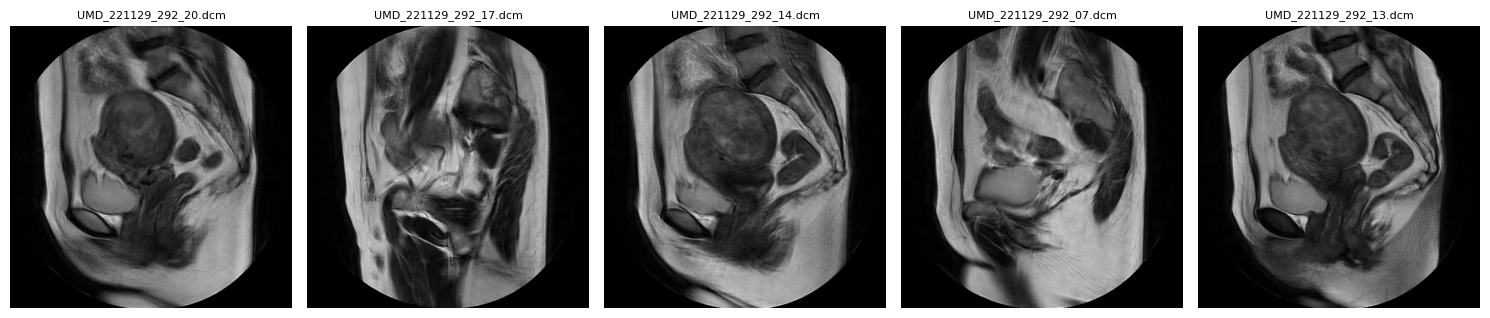

In [18]:
# Install python package for DICOM files
!pip install pydicom

import os
import matplotlib.pyplot as plt
import pydicom

# Path to the UMD dataset directory
data_directory = "/content/drive/MyDrive/UMD"

# Function to visualize DICOM images
def visualize_dicom_images(directory, num_images=10):
    images = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith('.dcm'):
                images.append(os.path.join(root, file))
                if len(images) >= num_images:
                    break
        if len(images) >= num_images:
            break

    if not images:
        print("No DICOM images found in the directory.")
        return

    print(f"Found {len(images)} DICOM images. Displaying the first {num_images} images.")

    # Plot the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i, image_path in enumerate(images):
        try:
            ds = pydicom.dcmread(image_path)
            axes[i].imshow(ds.pixel_array, cmap='gray')
            axes[i].set_title(os.path.basename(image_path), fontsize=8)
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading DICOM image {image_path}: {e}")

    plt.tight_layout()
    plt.show()

# Visualize some DICOM images from the dataset
visualize_dicom_images(data_directory)


In [ ]:
# assign batch sizes, image height and width
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# data preparation with image generator